#### Import Statements

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats

### Constants

In [2]:
ring_width = 768*2
ring_1_radius = 2048
delta_radius = 3072

### Math Functions

In [3]:
def triangular_number(n):
    return sum(range(1, n+1))

def ring_radius(n):
    return ring_1_radius + (n-1) * delta_radius

def arc_distance_between_strongholds(n):
    return 2*math.pi*ring_radius(n) / triangular_number(n + 1)

### Plots

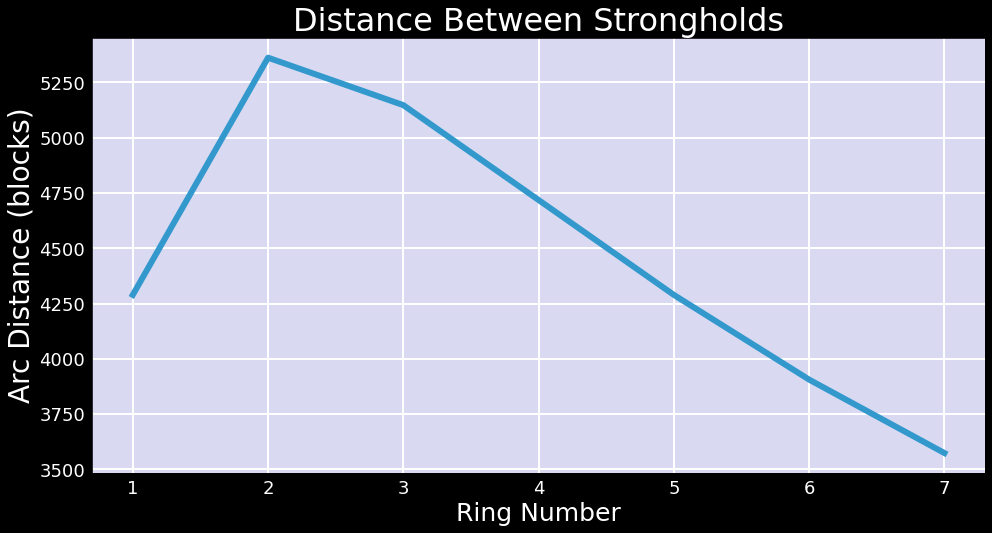

In [4]:
X = range(1, 8)
Y = [arc_distance_between_strongholds(n) for n in X]
fig = plt.figure(figsize=(16, 8))
plt.plot(X, Y, lw=6, color=(0.2, 0.6, 0.8))
plt.title("Distance Between Strongholds", fontsize=32, color=(1,1,1))
plt.xlabel("Ring Number", fontsize=25, color=(1,1,1))
plt.ylabel("Arc Distance (blocks)", fontsize=28, color=(1,1,1))

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.95))
plt.grid(color=(1, 1, 1), lw=2)
plt.xticks(fontsize=18, color=(1,1,1))
plt.yticks(fontsize=18, color=(1,1,1))
fig.patch.set_facecolor('black')

plt.show()

### Theoretical Explanation
The number of strongholds per ring is given by $$(n+1)(n+2)/2,$$ the $(n+1)$th triangular number.
The circumference of ring $n$ is given by $$2\pi(2048 + 3072(n-1)).$$

So the arc distance between strongholds is
$$\frac{2\pi(2048 + 3072(n-1))}{(n+1)(n+2)/2} = \frac{4\pi(2048 + 3072(n-1))}{(n+1)(n+2)} = 4096\pi\frac{3n - 1}{(n+1)(n+2)}.$$

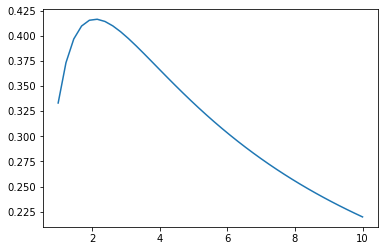

In [5]:
X = np.linspace(1, 10, 40)
Y = [(3*x-1) / (x+1)/(x+2) for x in X]
plt.plot(X, Y)
plt.show()

The derivative of this function is
$$4096\pi \frac{(2n+3)(3n-1) - 3(n+1)(n+2)}{(n+1)^2(n+2)^2} = 4096\pi\frac{6n^2+7n-3 - 3n^2 - 9n - 6}{(n+1)^2(n+2)^2} = 4096\pi\frac{3n^2 - 2n - 9}{(n+1)^2(n+2)^2}$$

It has a root slightly about 2, where the function has a local max.

### Get Data on Real Stronghold Locations

In [6]:
def read_stronghold_locations(filename):
    locations = []
    f = open(filename, "r")
    for line in f:
        try:
            location_ints = [int(s) for s in line.split()]
        except:
            print("Error: String {} can't be converted to int when reading from ".format(line) + filename)
        locations.append(location_ints)
    return locations

def get_distance(location):
    return math.sqrt(location[0]*location[0] + location[1]*location[1])

def get_distances(locations):
    return [get_distance(loc) for loc in locations]

#### Ring 1

DescribeResult(nobs=132, minmax=(1338.8950668368302, 2764.791854733372), mean=2060.04154212488, variance=155395.3015496679, skewness=-0.03656700998422076, kurtosis=-1.294376514535541)


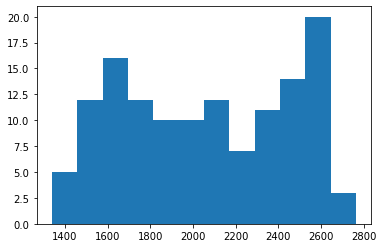

In [17]:
locations = read_stronghold_locations("StrongholdDataFiles\Ring1Locations.txt")
distances = get_distances(locations)
print(stats.describe(distances))
plt.hist(distances, bins=12)
plt.show()

## Calculate where to dig down
We will assume you dig down at (0, 2048), and then go clockwise.

In [8]:
def get_dig_location(theta, r, d):
    x = int(r*math.cos(theta))
    y = int(r*math.sin(theta))
    return (x, y)

def get_dig_locations(theta_0, r, d, num_strongholds, pass_number):
    clockwise = (pass_number % 2 == 0)
    dig_locations = []
    delta_theta = math.acos(1 - d*d / (r*r)) # law of cosines
    theta = theta_0
    
    while theta < 2*math.pi/num_strongholds:
        dig_locations.append(get_dig_location(theta, r, d))
        theta = theta + delta_theta
    
    return dig_locations

def print_all_dig_locations(ring_num, num_passes=3, d=100):
    pass_number = 1
    base_r = ring_radius(ring_num)
    theta_0 = 0
    while pass_number <= num_passes:
        if pass_number % 2 == 1:
            r = base_r + d*((pass_number - 1) // 2)
        else:
            r = base_r - d*(pass_number // 2)
        print("Dig Locations for Pass {}".format(pass_number))
        dig_locations = get_dig_locations(theta_0, r, d, triangular_number(ring_num + 1), pass_number)
        if pass_number % 2 == 0:
            dig_locations.reverse()
        print("Dig in {} locations".format(len(dig_locations)))
        print(dig_locations)
        pass_number += 1

#### Ring 1

In [9]:
print_all_dig_locations(1, num_passes=5, d=100)

Dig Locations for Pass 1
Dig in 31 locations
[(2048, 0), (2043, 141), (2028, 282), (2004, 421), (1970, 558), (1927, 693), (1874, 824), (1813, 952), (1743, 1074), (1664, 1192), (1578, 1304), (1484, 1410), (1383, 1509), (1276, 1601), (1162, 1685), (1043, 1762), (919, 1829), (791, 1888), (658, 1939), (523, 1979), (385, 2011), (245, 2033), (105, 2045), (-36, 2047), (-177, 2040), (-317, 2023), (-456, 1996), (-593, 1960), (-727, 1914), (-857, 1859), (-984, 1796)]
Dig Locations for Pass 2
Dig in 29 locations
[(-868, 1743), (-740, 1801), (-607, 1850), (-471, 1890), (-333, 1919), (-193, 1938), (-52, 1947), (89, 1945), (230, 1934), (370, 1912), (507, 1880), (642, 1838), (774, 1787), (902, 1726), (1025, 1656), (1142, 1577), (1254, 1490), (1358, 1395), (1456, 1293), (1546, 1184), (1628, 1069), (1701, 948), (1766, 822), (1821, 691), (1866, 557), (1901, 421), (1927, 281), (1942, 141), (1948, 0)]
Dig Locations for Pass 3
Dig in 32 locations
[(2148, 0), (2143, 141), (2129, 282), (2106, 421), (2073, 55

#### Ring 7

In [10]:
print_all_dig_locations(7, num_passes=5, d=128)

Dig Locations for Pass 1
Dig in 20 locations
[(20480, 0), (20479, 181), (20476, 362), (20472, 542), (20467, 723), (20460, 904), (20451, 1085), (20440, 1266), (20428, 1446), (20415, 1627), (20400, 1807), (20383, 1988), (20364, 2168), (20344, 2348), (20323, 2527), (20300, 2707), (20275, 2886), (20249, 3065), (20221, 3244), (20191, 3423)]
Dig Locations for Pass 2
Dig in 20 locations
[(20062, 3423), (20091, 3244), (20119, 3065), (20146, 2886), (20171, 2707), (20194, 2527), (20216, 2348), (20236, 2168), (20254, 1988), (20271, 1807), (20286, 1627), (20300, 1446), (20312, 1266), (20323, 1085), (20331, 904), (20339, 723), (20344, 542), (20348, 362), (20351, 181), (20352, 0)]
Dig Locations for Pass 3
Dig in 20 locations
[(20608, 0), (20607, 181), (20604, 362), (20600, 542), (20595, 723), (20588, 904), (20579, 1085), (20569, 1266), (20557, 1446), (20543, 1627), (20528, 1807), (20511, 1988), (20493, 2168), (20473, 2348), (20452, 2527), (20429, 2707), (20404, 2886), (20378, 3065), (20350, 3244), (